In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 

(3724, 3724, 3)


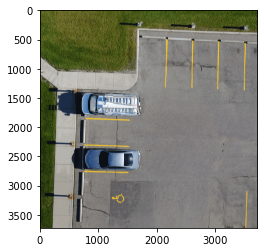

In [40]:
img_path = "data/Parking Lot/Lot1.tif"
#img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.imread(img_path)
#change to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)
#gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray_image)

extract the yellow object

pixel percentage: 2.58


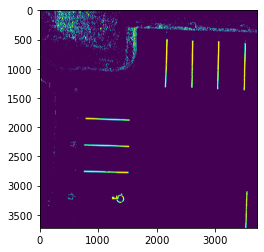

In [41]:
# Convert BGR to HSV
img_path = "data/Parking Lot/Lot1.tif"
#img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define range of yellow color in HSV
lower_yellow = np.array([20,100,100])
upper_yellow = np.array([30,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(img, lower_yellow, upper_yellow)

# Bitwise-AND mask and original image
output = cv2.bitwise_and(img, img, mask = mask)
ratio = cv2.countNonZero(mask)/(img.size/3)
print('pixel percentage:', np.round(ratio*100, 2))
plt.imshow(mask)
plt.show()

In [9]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
#img=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
#plt.imshow(img)

In [47]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts = 10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

NameError: name 'res2' is not defined

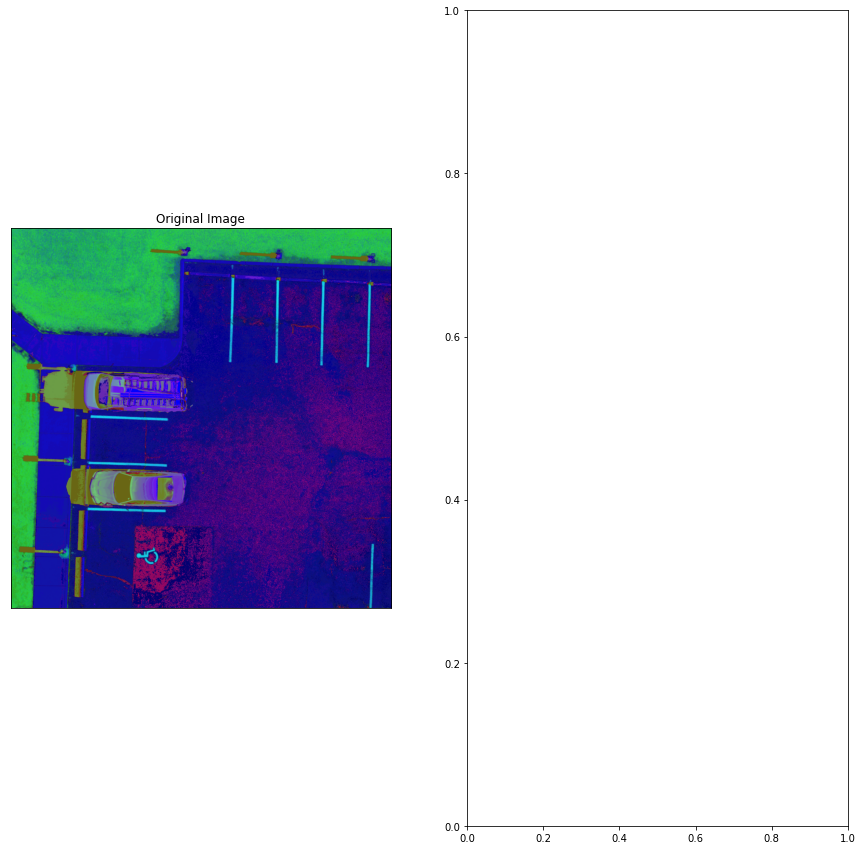

In [49]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(res2)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), 
plt.yticks([])
plt.show()

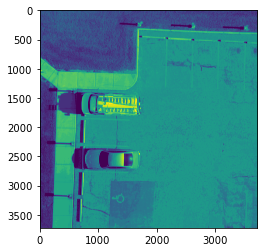

In [14]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

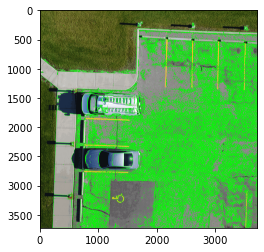

In [11]:
ret,thresh = cv2.threshold(gray_image,127,255,0) 
#calculate the contours from binary image
im,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
with_contours = cv2.drawContours(img,contours,-1,(0,255,0),3) 
plt.imshow(with_contours)

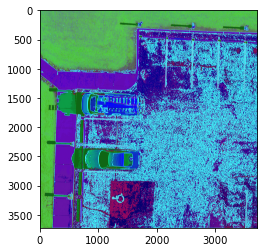

In [12]:
#converting image to HSV format
hsv_image = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
#plotting the HSV image
plt.imshow(hsv_image)

In [ ]:
cvInRangeS(imgHSV, cvScalar(20, 100, 100), cvScalar(30, 255, 255), imgThreshed)

In [4]:
def colorDetection(image):
    hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

    '''Red'''
    # Range for lower red
    red_lower = np.array([0,120,70])
    red_upper = np.array([10,255,255])
    mask_red1 = cv2.inRange(hsv, red_lower, red_upper)

    # Range for upper range
    red_lower = np.array([170,120,70])
    red_upper = np.array([180,255,255])
    mask_red2 = cv2.inRange(hsv, red_lower, red_upper)

    mask_red = mask_red1 + mask_red2

    red_output = cv2.bitwise_and(image, image, mask=mask_red)

    red_ratio=(cv2.countNonZero(mask_red))/(image.size/3)

    print("Red in image", np.round(red_ratio*100, 2))



    '''yellow'''
    # Range for upper range
    yellow_lower = np.array([20, 100, 100])
    yellow_upper = np.array([30, 255, 255])
    mask_yellow = cv2.inRange(hsv, yellow_lower, yellow_upper)

    yellow_output = cv2.bitwise_and(image, image, mask=mask_yellow)

    yellow_ratio =(cv2.countNonZero(mask_yellow))/(image.size/3)

    print("Yellow in image", np.round(yellow_ratio*100, 2))

In [5]:
colorDetection(img)

Red in image 0.01
Yellow in image 2.58


In [ ]:
    #img = cv.imread('image.jpg')
    #grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray_image, cv2.CV_32F, 1, 0)
    # find minimum and maximum intensities
    minVal = np.amin(sobelx)
    maxVal = np.amax(sobelx)
    draw = cv2.convertScaleAbs(sobelx, alpha=255.0/(maxVal - minVal), beta=-minVal * 255.0/(maxVal - minVal))
    cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
    cv2.imshow('image', draw)
    cv2.waitKey()

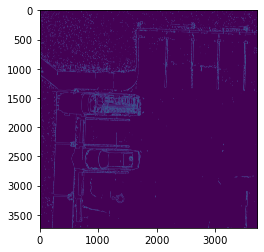

In [9]:
edges = cv2.Canny(img,100,200) 
#plot the edges
plt.imshow(edges)

Use Kmeans to do image segmentation

In [39]:
from sklearn.cluster import KMeans
#img_path = "data/Parking Lot/Lot3.tif"
#img = cv2.imread(img_path)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255
#vectorized = mask.reshape((-1,3))
vectorized = np.float32(mask)
kmeans = KMeans(n_clusters=2, random_state=0).fit(vectorized)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(cluster_pic)

ValueError: cannot reshape array of size 13868176 into shape (3724,3724,3)

In [38]:
mask.shape 

(3724, 3724)